Keras provides some utility functions to fetch and load common datasets, including **MNIST**, Fashion **MNIST**, and a few more. Let’s load Fashion MNIST . It’s already shuffled and split into a training set (60,000 images) and a test set (10,000 images), but we’ll hold out the last 5,000 images from the
training set for validation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np



In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

When loading MNIST or Fashion MNIST using Keras rather
than Scikit-Learn, one important difference is that every
image is represented as a 28 × 28 array rather than a 1D
array of size 784. Moreover, the pixel intensities are
represented as integers (from 0 to 255) rather than floats
(from 0.0 to 255.0). Let’s take a look at the shape and data
type of the training set

In [3]:
X_train.shape

(55000, 28, 28)

In [4]:
X_train.dtype

dtype('uint8')

For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats)

In [5]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

With MNIST, when the label is equal to 5, it means that the image represents the handwritten digit 5. Easy. For Fashion MNIST, however, we need the list of class names to know what we are dealing with:

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Ankle boot'

In [8]:
from IPython.display import HTML
HTML('<img src="https://www.researchgate.net/publication/342801790/figure/fig2/AS:911232181735425@1594266090934/Sample-images-from-Fashion-MNIST-dataset.png">')

Instead of adding the layers one by one as we just did, it’s
often more convenient to pass a list of layers when creating
the Sequential model. You can also drop the Input layer and
instead specify the input_shape in the first lay

In [9]:
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
tf.keras.layers.Dense(300, activation="relu"),
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(10, activation="softmax")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.layers
hidden1 = model.layers[1]
hidden1.name

'dense'

In [12]:
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

## **Compiling the model**

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

### **Training and evaluating the model**

In [14]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 20s 11ms/step - loss: 0.7239 - accuracy: 0.7626 - val_loss: 0.5130 - val_accuracy: 0.8228
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4893 - accuracy: 0.8300 - val_loss: 0.4641 - val_accuracy: 0.8372
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4435 - accuracy: 0.8463 - val_loss: 0.4375 - val_accuracy: 0.8412
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4157 - accuracy: 0.8546 - val_loss: 0.4131 - val_accuracy: 0.8544
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3958 - accuracy: 0.8620 - val_loss: 0.3797 - val_accuracy: 0.8586
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3792 - accuracy: 0.8678 - val_loss: 0.3954 - val_accuracy: 0.8578
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3666 - accuracy: 0.8718 - val_loss: 0.3862 - val_accurac

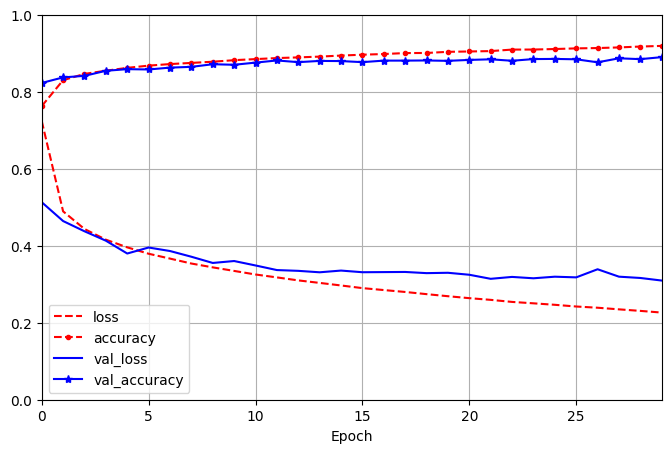

In [15]:
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3238 - accuracy: 0.8851


[0.3237721621990204, 0.8851000070571899]

## **Using the model to make predictions**

In [17]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred = y_proba.argmax(axis=-1)
np.array(class_names)[y_pred]


1/1 [==============================] - 0s 148ms/step


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [18]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## **Building a Regression MLP Using the Sequential API**

In [19]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
norm_layer,
tf.keras.layers.Dense(50, activation="relu"),
tf.keras.layers.Dense(50, activation="relu"),
tf.keras.layers.Dense(50, activation="relu"),
tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=
["RootMeanSquaredError"])
norm_layer.adapt(X_train)


In [20]:
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 12s 6ms/step - loss: 8.6430 - root_mean_squared_error: 2.9399 - val_loss: 8.4277 - val_root_mean_squared_error: 2.9032
Epoch 2/20
1719/1719 [==============================] - 9s 5ms/step - loss: 8.3102 - root_mean_squared_error: 2.8827 - val_loss: 8.3966 - val_root_mean_squared_error: 2.8979
Epoch 3/20
1719/1719 [==============================] - 10s 6ms/step - loss: 8.2902 - root_mean_squared_error: 2.8793 - val_loss: 8.3984 - val_root_mean_squared_error: 2.8981
Epoch 4/20
1719/1719 [==============================] - 10s 6ms/step - loss: 8.2818 - root_mean_squared_error: 2.8778 - val_loss: 8.4529 - val_root_mean_squared_error: 2.9075
Epoch 5/20
1719/1719 [==============================] - 10s 6ms/step - loss: 8.2735 - root_mean_squared_error: 2.8764 - val_loss: 8.3930 - val_root_mean_squared_error: 2.8973
Epoch 6/20
1719/1719 [==============================] - 10s 6ms/step - loss: 8.2633 - root_mean_squared_error: 2.8746 - val_lo

In [21]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]

313/313 [==============================] - 1s 3ms/step - loss: 8.2482 - root_mean_squared_error: 2.8720
